Plotting some of the neutrino fluxes, using the formula in Vaananen and Volpe (also in Kate's chapter in state of the art neutrino physics)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

In [2]:
plt.style.use('jfc') # my custom style sheet
%config InlineBackend.figure_format = 'retina'

In [3]:
Fl = 1e52 # flux, erg/s

Ee = 10 # nue, MeV
Eeb = 13 # nue bar, MeV
Ex = [15,18,25] # nux, MeV

ae = 3 # alpha nue
aeb = 3 # alpha nue bar
ax = [2,4,7] # alpha nux

In [4]:
def phi_e(E):
    
    norm = Fl/Ee*(ae+1)**(ae+1)/(Ee*gamma(ae+1))
    return norm*(E/Ee)**ae*np.exp(-(ae+1)*E/Ee)

def phi_eb(E):
    
    norm = Fl/Eeb*(aeb+1)**(aeb+1)/(Eeb*gamma(aeb+1))
    return norm*(E/Eeb)**aeb*np.exp(-(aeb+1)*E/Eeb)

def phi_x(E,ex,a):
    
    norm = Fl/ex*(a+1)**(a+1)/(ex*gamma(a+1))
    return norm*(E/ex)**a*np.exp(-(a+1)*E/ex)

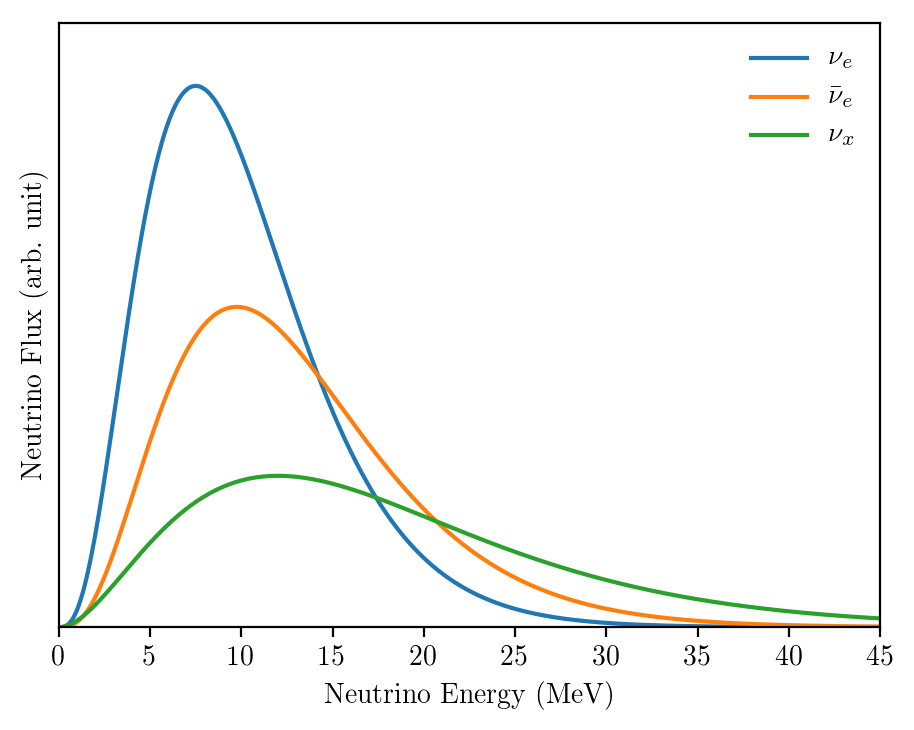

In [5]:
fig1,ax1 = plt.subplots(1,1)

x = np.linspace(0,60,1000)
ax1.plot(x,phi_e(x),label=r'$\nu_e$')
ax1.plot(x,phi_eb(x),label=r'$\bar{\nu}_e$')
ax1.plot(x,phi_x(x,18,ax[0]),label=r'$\nu_x$')

ax1.legend()

ax1.set_xlabel("Neutrino Energy (MeV)")
ax1.set_ylabel("Neutrino Flux (arb. unit)")

ax1.set_xlim(0,45)
ax1.set_ylim(0,1e50)

ax1.set_yticks([])

fig1.savefig("nue_flux.pdf")
plt.show()

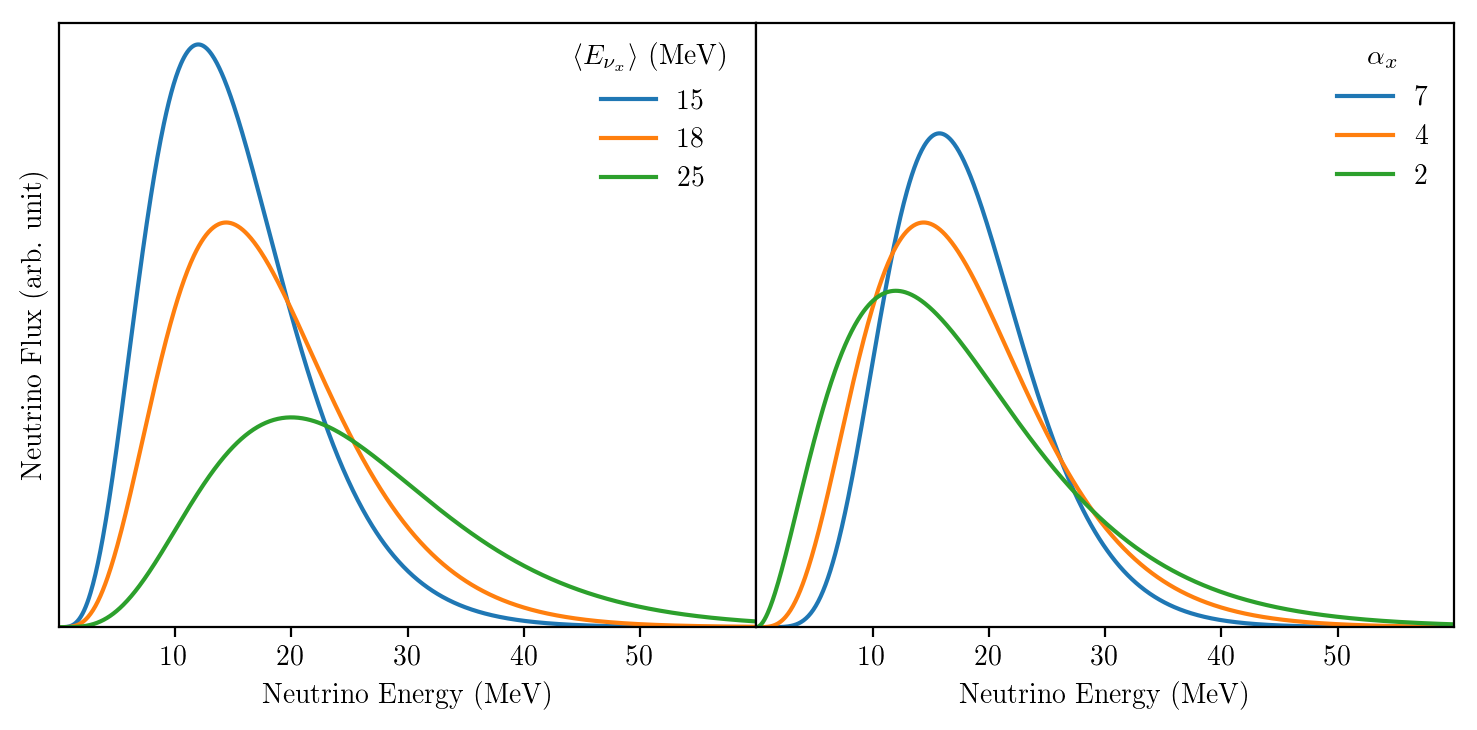

In [9]:
fig2,(ax21,ax22) = plt.subplots(1,2,figsize=(9,4),sharey=True)
plt.subplots_adjust(wspace=0)

x = np.linspace(0,70,1000)

ax21.plot(x,phi_x(x,Ex[0],ax[1]),label='15')
ax21.plot(x,phi_x(x,Ex[1],ax[1]),label='18')
ax21.plot(x,phi_x(x,Ex[2],ax[1]),label='25')
ax21.legend(title=r"$\langle E_{\nu_x} \rangle$ (MeV)")

ax22.plot(x,phi_x(x,Ex[1],ax[2]),label='7')
ax22.plot(x,phi_x(x,Ex[1],ax[1]),label='4')
ax22.plot(x,phi_x(x,Ex[1],ax[0]),label='2')
ax22.legend(title=r"$\alpha_x$")

ax21.set_xlabel("Neutrino Energy (MeV)")
ax22.set_xlabel("Neutrino Energy (MeV)")
ax21.set_ylabel("Neutrino Flux (arb. unit)")

ax21.set_xlim(0,60)
ax22.set_xlim(0,60)
ax21.set_ylim(0,0.45e50)

ax21.set_xticks([10,20,30,40,50])
ax22.set_xticks([10,20,30,40,50])
ax21.set_yticks([])

fig2.savefig("nux_flux.pdf")
plt.show()